# Preprocessing the Dataset

In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv("Delhi Air Quality Data.csv",usecols=['Datetime','AQI'],parse_dates=['Datetime'])
df.set_index('Datetime',inplace=True)

In [2]:
df.head(10)

,AQI
Datetime,
2015-01-01 01:00:00,NaN
2015-01-01 02:00:00,NaN
2015-01-01 03:00:00,NaN
2015-01-01 04:00:00,NaN
2015-01-01 05:00:00,NaN
2015-01-01 06:00:00,NaN
2015-01-01 07:00:00,NaN
2015-01-01 08:00:00,NaN
2015-01-01 09:00:00,NaN


In [3]:
# Check for missing values

df['AQI'].isnull().sum()

498

In [4]:
#df[['AQI']].interpolate(method='polynomial',order=21,inplace=True)

df=df.bfill()

df.sort_values('Datetime',inplace=True)

In [5]:
# Check for missing values

df['AQI'].isnull().sum()

0

In [6]:
#df.to_csv("Interpolated data.csv")

In [7]:
# Functions to calculate RMSE and MAPE scores

from sklearn import metrics
def calculateRMSE(x,y):
    return (metrics.mean_squared_error(x,y))**0.5

def calculateMAPE(x,y):
    return (100/len(x))*sum(np.abs([(x[i]-y[i])/x[i] for i in range(len(x))]))

In [18]:
# Function for Theil's U-1 Statistic score

def theils(x,y):
    y = y
    x = x
    df = pd.DataFrame({'X':x, 'Y': y})
    df['(X - Y)^2'] = np.square(df['X'] - df['Y'])
    df['Y^2'] = np.square(df['Y'])
    df['X^2'] = np.square(df['X'])
    return (np.sqrt(np.mean(df['(X - Y)^2'])))/(np.sqrt(np.mean(df['Y^2']))+np.sqrt(np.mean(df['X^2'])))

Text(0.5, 1.0, 'Delhi Hourly AQI from 2015-01-01 01:00:00 to 2020-12-06 23:00:00')

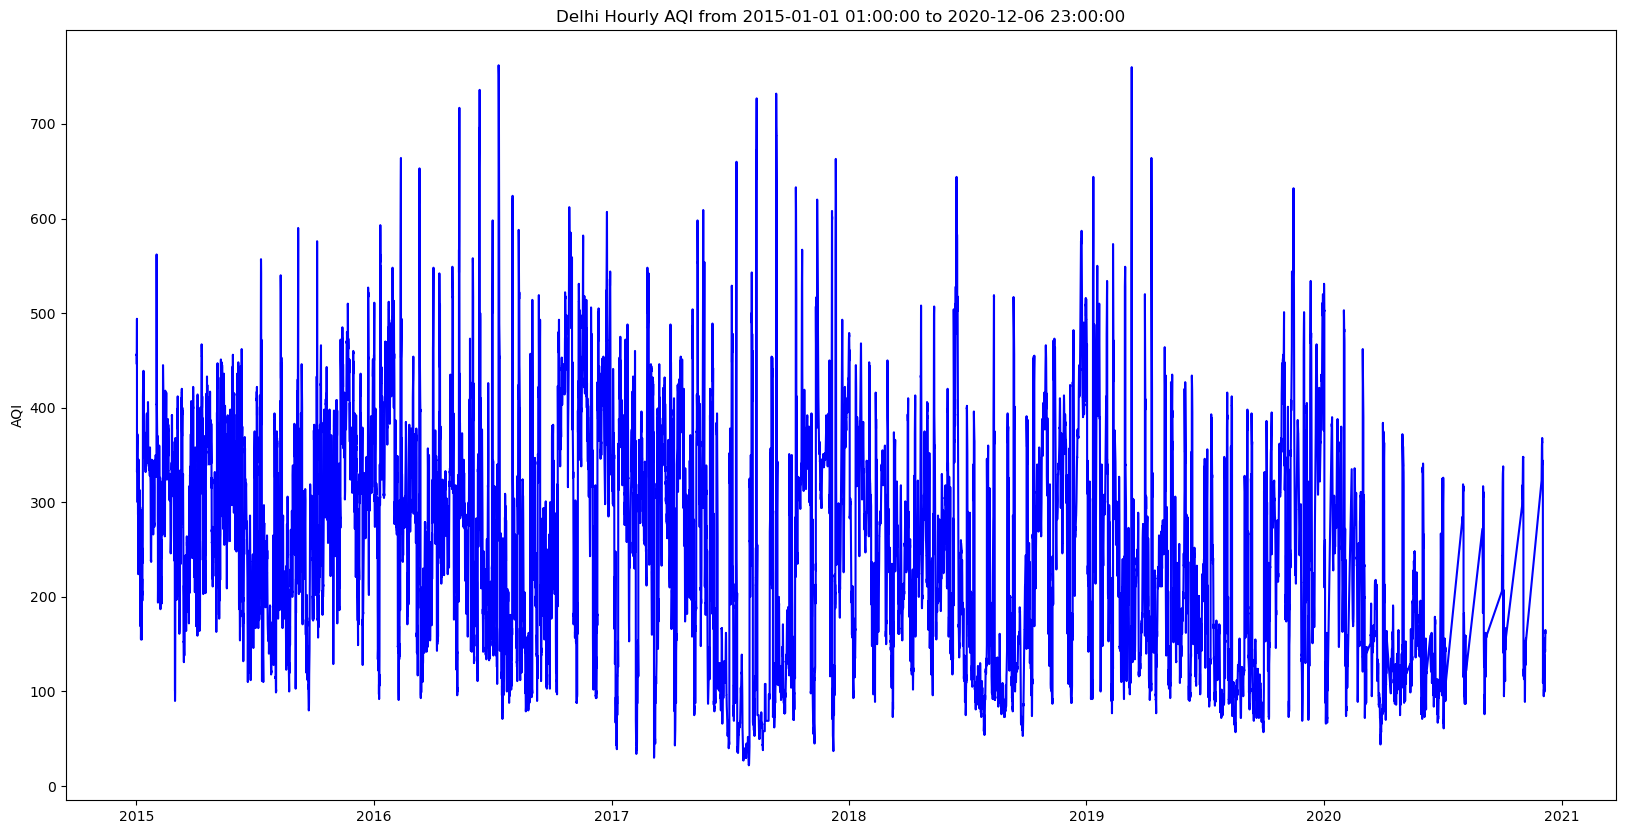

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plt.plot(df.index,df.AQI,color='b')
#plt.xlabel('Hour')
plt.ylabel('AQI')
plt.title('Delhi Hourly AQI from '+str(df.index[0])+" to "+str(df.index[-1]))

# ARMA Model

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


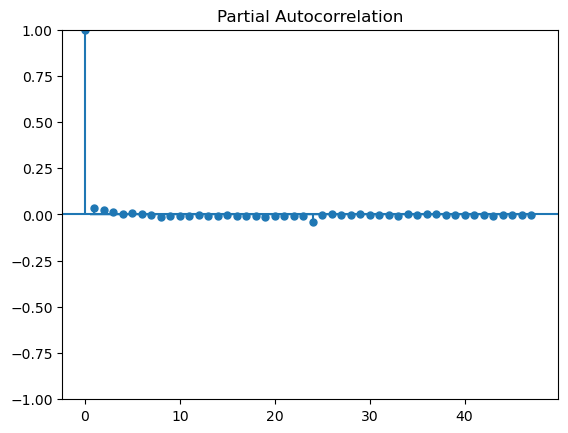

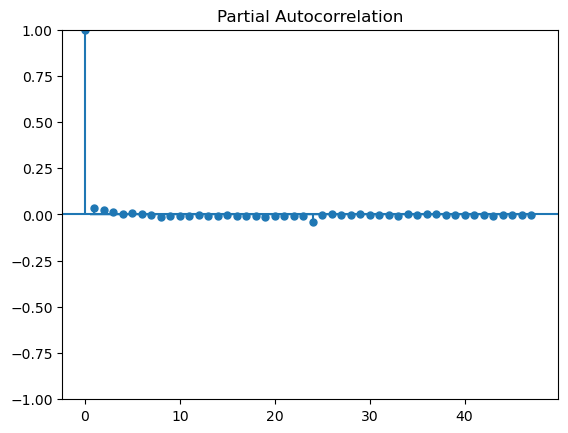

In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_pacf

# PACF plot of 1st differenced series
plot_pacf(df['AQI'].diff().dropna())

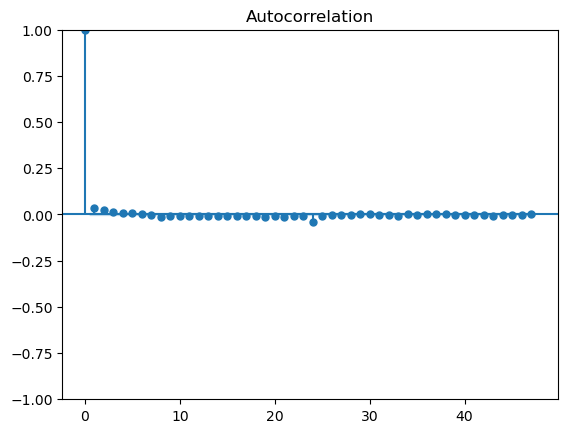

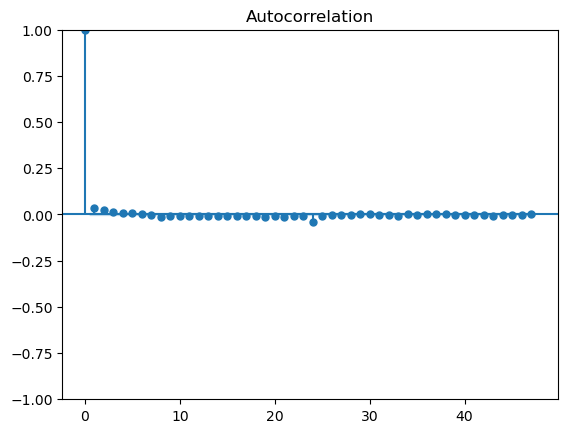

In [11]:
#%matplotlib inline
#import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf

# PACF plot of 1st differenced series
plot_acf(df['AQI'].diff().dropna())

In [12]:
from statsmodels.tsa.arima.model import ARIMA

model_arma=ARIMA(df['AQI'],order=(1,0,1))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [13]:
results_arma=model_arma.fit()

In [14]:
results_arma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    AQI   No. Observations:                48192
Model:                 ARIMA(1, 0, 1)   Log Likelihood             -213033.282
Date:                Mon, 05 Dec 2022   AIC                         426074.564
Time:                        21:15:51   BIC                         426109.696
Sample:                             0   HQIC                        426085.588
                              - 48192                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        258.8168      7.296     35.473      0.000     244.516     273.117
ar.L1          0.9852      0.001   1017.119      0.000       0.983       0.987
ma.L1          0.0396      0.005      7.439      0.000       0.029       0.050
sigma2       404.6839      0.463    873.367      0.000     403.776     405.592
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):          48161330.11
Prob(Q):                              0.78   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                             1.03
Prob(H) (two-sided):                  0.00   Kurtosis:                       157.86
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

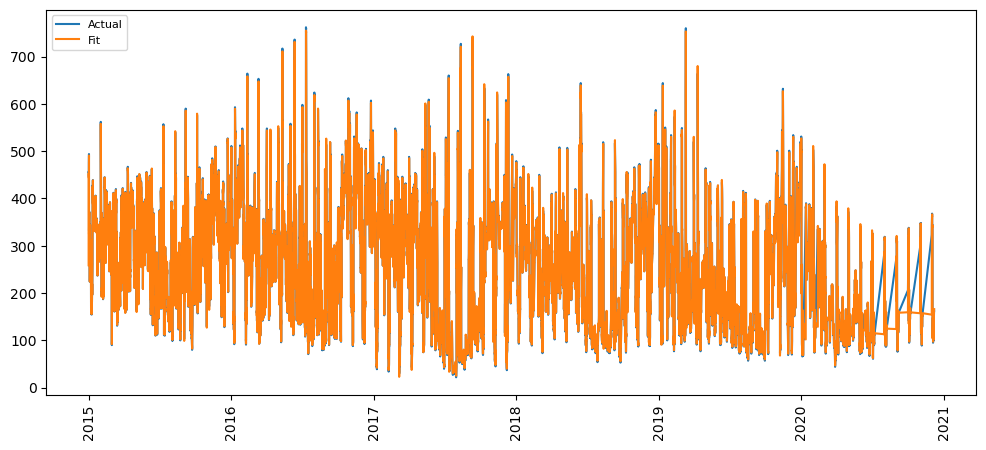

In [15]:
# Plot
%matplotlib inline
import matplotlib.pyplot as plt 

plt.figure(figsize=(12,5))

actual = df['AQI']
fittedvals = actual-results_arma.resid

plt.plot(actual, label='Actual')
plt.plot(fittedvals, label='Fit')

degrees = 90
plt.xticks(rotation=degrees)
plt.legend(loc='upper left', fontsize=8)

In [16]:
rmse_arma = calculateRMSE(actual.dropna(),fittedvals.dropna())
mape_arma = calculateMAPE(actual.dropna(),fittedvals.dropna())

print("The RMSE of the ARMA model is ",rmse_arma)
print("The MAPE of the ARMA model is ",mape_arma)

The RMSE of the ARMA model is  20.135896895461453
The MAPE of the ARMA model is  2.8856774281796236


In [19]:
theils_arma = theils(actual,fittedvals)

print("The Theil's U Statistic of the ARMA model is ",theils_arma)

The Theil's U Statistic of the ARMA model is  0.03523106860556639


# ARIMA Model

In [20]:
import pmdarima as pm
import pandas as pd

model = pm.auto_arima(df['AQI'], start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=4, # maximum p and q
                      m=1,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=False,   # No Seasonality
                      start_P=0, 
                      D=0, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=426365.269, Time=2.76 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=681953.789, Time=0.74 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=inf, Time=0.96 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=619600.730, Time=10.29 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=426325.435, Time=7.90 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=inf, Time=1.37 sec
 ARIMA(3,0,1)(0,0,0)[0]             : AIC=426345.046, Time=11.68 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=426317.296, Time=11.10 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=426333.107, Time=3.68 sec
 ARIMA(3,0,2)(0,0,0)[0]             : AIC=426321.476, Time=12.54 sec
 ARIMA(2,0,3)(0,0,0)[0]             : AIC=426318.847, Time=5.27 sec
 ARIMA(1,0,3)(0,0,0)[0]             : AIC=426321.764, Time=4.55 sec
 ARIMA(3,0,3)(0,0,0)[0]             : AIC=426320.903, Time=16.59 sec
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=425976.659, Time=74.37 sec
 ARIMA(1,0,2)

### Even running an Auto Arima model, we get the d value to be zero. Effectively it will be an ARMA model, but the p value will be 2 instead of 1.

In [21]:
from statsmodels.tsa.arima.model import ARIMA

model_arima=ARIMA(df['AQI'],order=(2,0,1))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [22]:
results_arima=model_arima.fit()

In [23]:
results_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    AQI   No. Observations:                48192
Model:                 ARIMA(2, 0, 1)   Log Likelihood             -212982.682
Date:                Mon, 05 Dec 2022   AIC                         425975.365
Time:                        21:26:40   BIC                         426019.279
Sample:                             0   HQIC                        425989.144
                              - 48192                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        258.8207      6.618     39.108      0.000     245.850     271.792
ar.L1          1.7285      0.047     36.989      0.000       1.637       1.820
ar.L2         -0.7333      0.046    -15.942      0.000      -0.823      -0.643
ma.L1         -0.7020      0.049    -14.358      0.000      -0.798      -0.606
sigma2       403.8146      0.462    873.695      0.000     402.909     404.721
===================================================================================
Ljung-Box (L1) (Q):                   0.20   Jarque-Bera (JB):          48392806.65
Prob(Q):                              0.65   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                             1.04
Prob(H) (two-sided):                  0.00   Kurtosis:                       158.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

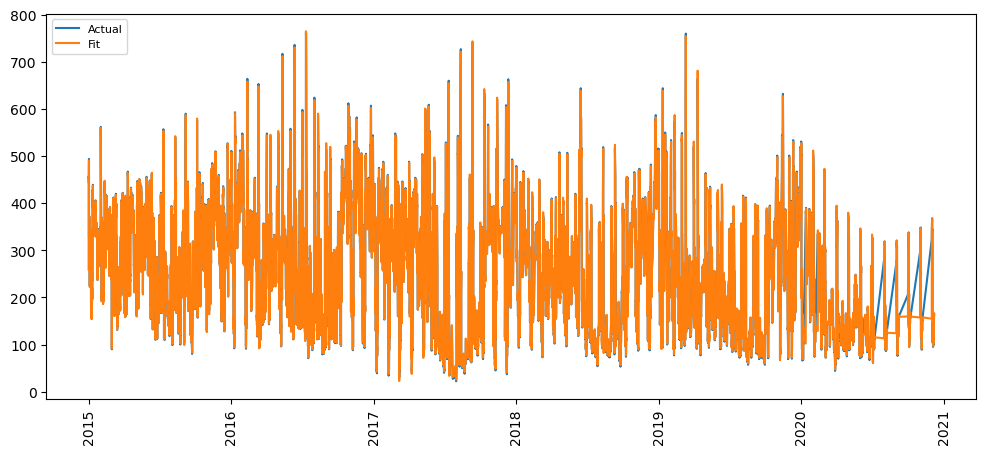

In [24]:
# Plot
%matplotlib inline
import matplotlib.pyplot as plt 

plt.figure(figsize=(12,5))

actual = df['AQI']
fittedvals = actual-results_arima.resid

plt.plot(actual, label='Actual')
plt.plot(fittedvals, label='Fit')

degrees = 90
plt.xticks(rotation=degrees)
plt.legend(loc='upper left', fontsize=8)

In [25]:
rmse_arima = calculateRMSE(actual.dropna(),fittedvals.dropna())
mape_arima = calculateMAPE(actual.dropna(),fittedvals.dropna())

print("The RMSE of the ARMA model is ",rmse_arima)
print("The MAPE of the ARMA model is ",mape_arima)

The RMSE of the ARMA model is  20.11480714837514
The MAPE of the ARMA model is  2.8983417661208386


In [26]:
theils_arima = theils(actual,fittedvals)

print("The Theil's U Statistic of the ARIMA model is ",theils_arima)

The Theil's U Statistic of the ARIMA model is  0.03519391420110315


# SARIMA Model

In [26]:
#import pmdarima as pm
#import pandas as pd

model = pm.auto_arima(df['AQI'], start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=3, max_q=3, # maximum p and q
                      m=24,              # frequency of series
                      d=None,           # let model determine 'd'
                      seasonal=True,   # Seasonality
                      start_P=1, 
                      D=None, 
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(1,0,1)[24] intercept   : AIC=inf, Time=278.60 sec
 ARIMA(0,0,0)(0,0,0)[24] intercept   : AIC=599786.980, Time=0.64 sec
 ARIMA(1,0,0)(1,0,0)[24] intercept   : AIC=426087.500, Time=98.20 sec
 ARIMA(0,0,1)(0,0,1)[24] intercept   : AIC=527388.265, Time=178.97 sec
 ARIMA(0,0,0)(0,0,0)[24]             : AIC=681953.789, Time=0.40 sec
 ARIMA(1,0,0)(0,0,0)[24] intercept   : AIC=426150.508, Time=1.35 sec


MemoryError: Unable to allocate 883. MiB for an array with shape (49, 49, 48193) and data type float64

### Got a Memory error on the SARIMA Auto Arima code. That is, the memory on the laptop is running short of the requirements.

### Since we have the partial results, I am using the partial results derived to select the best SARIMA model.

### ARIMA(1,0,0)(1,0,0)[24] seems to be the best model based on AIC scores.

In [27]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# define model
model = SARIMAX(df['AQI'], order=(1, 0, 0), seasonal_order=(1, 0, 0, 24),
enforce_stationarity=False, enforce_invertibility=False)
# fit model
model_fit = model.fit(disp=False)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [28]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                AQI   No. Observations:                48192
Model:             SARIMAX(1, 0, 0)x(1, 0, 0, 24)   Log Likelihood             -213035.474
Date:                            Mon, 05 Dec 2022   AIC                         426076.948
Time:                                    21:27:41   BIC                         426103.295
Sample:                                         0   HQIC                        426085.215
                                          - 48192                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9977      0.000   3441.572      0.000       0.997       0.998
ar.S.L24      -0.0402      0.001    -55.149      0.000      -0.042      -0.039
sigma2       409.6615      0.311   1318.891      0.000     409.053     410.270
===================================================================================
Ljung-Box (L1) (Q):                  56.30   Jarque-Bera (JB):          48598296.42
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.85   Skew:                             1.11
Prob(H) (two-sided):                  0.00   Kurtosis:                       158.60
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

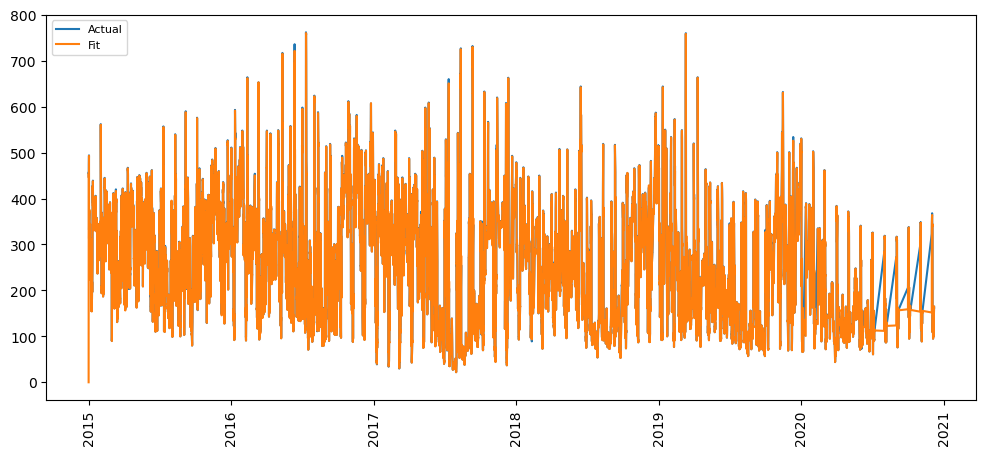

In [29]:
# Plot
%matplotlib inline
import matplotlib.pyplot as plt 

plt.figure(figsize=(12,5))

actual = df['AQI']
fittedvals = actual-model_fit.resid

plt.plot(actual, label='Actual')
plt.plot(fittedvals, label='Fit')

degrees = 90
plt.xticks(rotation=degrees)
plt.legend(loc='upper left', fontsize=8)

In [30]:
rmse_sarima = calculateRMSE(actual.dropna(),fittedvals.dropna())
mape_sarima = calculateMAPE(actual.dropna(),fittedvals.dropna())

print("The RMSE of the SARMA model is ",rmse_sarima)
print("The MAPE of the SARMA model is ",mape_sarima)

The RMSE of the SARMA model is  20.27952762884133
The MAPE of the SARMA model is  2.600944127581861


In [31]:
theils_sarima = theils(actual,fittedvals)

print("The Theil's U Statistic of the SARIMA model is ",theils_sarima)

The Theil's U Statistic of the SARIMA model is  0.03548276423654854


# LSTM Model

In [32]:
#step 2: preprocessing
#B) Scaling
from sklearn.preprocessing import MinMaxScaler

values = df[df.columns[[0]]].values
# ensure all data is float
values = values.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(values)
scaled

array([[0.5864865 ],
       [0.5864865 ],
       [0.5864865 ],
       ...,
       [0.19324324],
       [0.19324324],
       [0.1891892 ]], dtype=float32)

In [33]:
# split a univariate sequence into samples
from numpy import array

def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

In [34]:
# choose a number of time steps
n_steps = 3

raw_seq = scaled
# split into samples
X, y = split_sequence(raw_seq, n_steps)
X

array([[[0.5864865 ],
        [0.5864865 ],
        [0.5864865 ]],

       [[0.5864865 ],
        [0.5864865 ],
        [0.5864865 ]],

       [[0.5864865 ],
        [0.5864865 ],
        [0.5864865 ]],

       ...,

       [[0.19189191],
        [0.19189191],
        [0.19324324]],

       [[0.19189191],
        [0.19324324],
        [0.19324324]],

       [[0.19324324],
        [0.19324324],
        [0.19324324]]], dtype=float32)

In [35]:
x=df.shape
rows=x[0]
import math
train_rows=math.ceil(rows*0.80)

In [36]:
train_X = X[0:(train_rows-n_steps),:]
train_y = y[0:(train_rows-n_steps)]
test_X = X[(train_rows-n_steps):rows,:]
test_y = y[(train_rows-n_steps):rows]

In [37]:
# univariate lstm example

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense


# reshape from [samples, timesteps] into [samples, timesteps, features]
n_features = 1
train_X = train_X.reshape((train_X.shape[0], train_X.shape[1], n_features))
# define model
LSTM_model = Sequential()
LSTM_model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
LSTM_model.add(Dense(1))
LSTM_model.compile(optimizer='adam', loss='mse')
# fit model
LSTM_model.fit(train_X, train_y, epochs=200, verbose=2)

Epoch 1/200
1205/1205 - 7s - loss: 0.0055 - 7s/epoch - 6ms/step
Epoch 2/200
1205/1205 - 5s - loss: 9.0258e-04 - 5s/epoch - 4ms/step
Epoch 3/200
1205/1205 - 5s - loss: 8.4231e-04 - 5s/epoch - 4ms/step
Epoch 4/200
1205/1205 - 5s - loss: 8.3788e-04 - 5s/epoch - 4ms/step
Epoch 5/200
1205/1205 - 5s - loss: 8.3420e-04 - 5s/epoch - 4ms/step
Epoch 6/200
1205/1205 - 5s - loss: 8.3109e-04 - 5s/epoch - 4ms/step
Epoch 7/200
1205/1205 - 5s - loss: 8.2733e-04 - 5s/epoch - 4ms/step
Epoch 8/200
1205/1205 - 5s - loss: 8.2938e-04 - 5s/epoch - 4ms/step
Epoch 9/200
1205/1205 - 5s - loss: 8.2529e-04 - 5s/epoch - 4ms/step
Epoch 10/200
1205/1205 - 5s - loss: 8.1599e-04 - 5s/epoch - 4ms/step
Epoch 11/200
1205/1205 - 5s - loss: 8.2005e-04 - 5s/epoch - 4ms/step
Epoch 12/200
1205/1205 - 5s - loss: 8.2617e-04 - 5s/epoch - 4ms/step
Epoch 13/200
1205/1205 - 5s - loss: 8.1154e-04 - 5s/epoch - 4ms/step
Epoch 14/200
1205/1205 - 5s - loss: 8.1888e-04 - 5s/epoch - 4ms/step
Epoch 15/200
1205/1205 - 5s - loss: 8.1946e-04 

Epoch 120/200
1205/1205 - 3s - loss: 7.8266e-04 - 3s/epoch - 3ms/step
Epoch 121/200
1205/1205 - 3s - loss: 7.8220e-04 - 3s/epoch - 3ms/step
Epoch 122/200
1205/1205 - 3s - loss: 7.8445e-04 - 3s/epoch - 2ms/step
Epoch 123/200
1205/1205 - 3s - loss: 7.8246e-04 - 3s/epoch - 2ms/step
Epoch 124/200
1205/1205 - 3s - loss: 7.8342e-04 - 3s/epoch - 2ms/step
Epoch 125/200
1205/1205 - 3s - loss: 7.8526e-04 - 3s/epoch - 2ms/step
Epoch 126/200
1205/1205 - 3s - loss: 7.8300e-04 - 3s/epoch - 2ms/step
Epoch 127/200
1205/1205 - 3s - loss: 7.8223e-04 - 3s/epoch - 2ms/step
Epoch 128/200
1205/1205 - 3s - loss: 7.8275e-04 - 3s/epoch - 2ms/step
Epoch 129/200
1205/1205 - 3s - loss: 7.8291e-04 - 3s/epoch - 2ms/step
Epoch 130/200
1205/1205 - 3s - loss: 7.8268e-04 - 3s/epoch - 2ms/step
Epoch 131/200
1205/1205 - 3s - loss: 7.8193e-04 - 3s/epoch - 2ms/step
Epoch 132/200
1205/1205 - 3s - loss: 7.8113e-04 - 3s/epoch - 2ms/step
Epoch 133/200
1205/1205 - 3s - loss: 7.8378e-04 - 3s/epoch - 2ms/step
Epoch 134/200
1205/1

In [38]:
# demonstrate prediction
test_X = test_X.reshape((test_X.shape[0], test_X.shape[1], n_features))
yhat = LSTM_model.predict(test_X, verbose=2)

302/302 - 1s - 567ms/epoch - 2ms/step


In [39]:
predictions = scaler.inverse_transform(yhat)
predictions

array([[146.11891],
       [149.9761 ],
       [148.70862],
       ...,
       [167.81642],
       [167.24289],
       [167.23262]], dtype=float32)

In [40]:
actual = scaler.inverse_transform(test_y)
actual

array([[145.     ],
       [146.     ],
       [146.99998],
       ...,
       [164.99998],
       [164.99998],
       [162.     ]], dtype=float32)

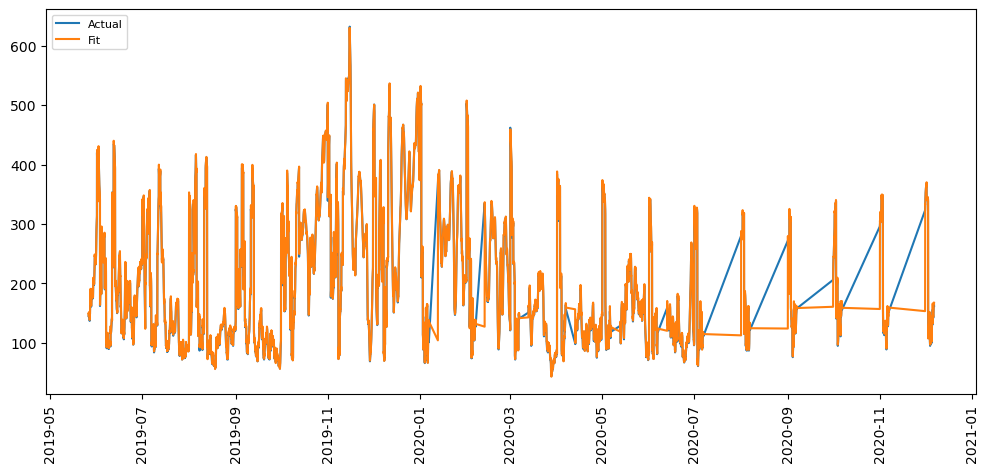

In [65]:
# Plot
%matplotlib inline
import matplotlib.pyplot as plt 

plt.figure(figsize=(12,5))

time_index = df.iloc[train_rows:rows,:].index
plt.plot(time_index,actual, label='Actual')
plt.plot(time_index,predictions, label='Fit')

degrees = 90
plt.xticks(rotation=degrees)
plt.legend(loc='upper left', fontsize=8)

In [42]:
rmse_lstm = calculateRMSE(actual,predictions)
mape_lstm = calculateMAPE(actual,predictions)

print("The RMSE of the LSTM model is ",rmse_lstm)
print("The MAPE of the LSTM model is ",mape_lstm)

The RMSE of the LSTM model is  17.187847120074313
The MAPE of the LSTM model is  [2.6115632]


In [44]:
theils_lstm = theils(actual.flatten(),predictions.flatten())

print("The Theil's U Statistic of the LSTM model is ",theils_lstm)

The Theil's U Statistic of the LSTM model is  0.03673530113732017
